### EVANDRO FONTANA ROMEIRO

Dados escolhidos:

-> IDH

-> Acesso a saneamento básico (percentual da população)

-> Urbanização (percentual da população)

<h2> INTRODUÇÃO </h2>

Esse projeto tem por objetivo o estudo das variaveis IDH, acesso da população a saneamento básico (em porcentagem da população) e urbanização (em porcentagem da população) de diversões países para descobrir como se relacionam e se possuem correlação entre si. Tais variaveis foram selecionadas para análise com o intuito de descobrir se o processo histórico de transição de uma sociedade predominantemente rural para uma sociedade em que a maioria das pessoas vivem nas grandes cidades e o acesso a saneamento básico, como rede de esgoto e acesso a água encanada, foram um pré-requisito para o aumento da qualidade de vida das pessoas nessa comunidade.

<h2>PERGUNTA</h2>

O acesso a saneamento básico e a urbanização são condições necessárias para o aumento da qualidade de vida em um país(IDH)?

<h3>HIPOTESES</h3>

Utilizando o senso comum e os conhecimento obtidos antes da análise realizado abaixo será feite hipoteses de como as variaveis se relacionam:
<li>
    <ul>O IDH e o acesso ao saneamento básico estão fortemente relacionados;</ul>
    <ul>O IDH e a Urbanização possuem fraca correlação; e</ul> 
    <ul>A Urbanização e a Acesso a Saneamento possuem relação moderada.</ul>
</li>

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import math as math
from scipy import stats
import matplotlib.pyplot as plt

In [14]:
#Função retirada do Notebook disponibilizado pelos professores no BlackBoard com alterações do aluno Enrico Nardi e minhas. 
def reta(dados_x, dados_y,nome_grafico, nome_x, nome_y, p_color,l_color):    
    a = dados_y.cov(dados_x) / dados_x.var()
    b = dados_y.mean() - a*dados_x.mean()
    
    print('Ajuste linear entre X3 e X4:')
    print('Coeficiente linear:', b)
    print('Coeficiente angular:', a)
    
    fig = plt.figure(figsize=(8, 6))
    plt.scatter(dados_x, dados_y, c= p_color, alpha=1)
    plt.title(nome_grafico)
    plt.xlabel(nome_x)
    plt.ylabel(nome_y)

    plt.plot((dados_x.min(), dados_x.max()), (a*dados_x.min()+b, a*dados_x.max()+b), color=l_color)
    plt.legend(['Linha de tendência da amostra'])
    

 
    #plt.tight_layout()
    plt.show()

In [15]:
dados_IDH = pd.read_excel('hdi_human_development_index.xlsx')
dados_San = pd.read_excel('at_least_basic_sanitation_overall_access_percent.xlsx')
dados_Urb = pd.read_excel('urban_population_percent_of_total.xlsx')

In [16]:
data_IDH = dados_IDH.set_index('geo')
data_San = dados_San.set_index('geo')
data_Urb = dados_Urb.set_index('geo')

In [17]:
data_IDH2011 = data_IDH.loc[:,[2011]]
data_San2011 = data_San.loc[:,[2011]]
data_Urb2011 = data_Urb.loc[:,[2011]]
data_IDH2011.dropna(0);
data_San2011.dropna(0);
data_Urb2011.dropna(0);


In [18]:
data_IDH2011.describe()

2011
count  187.000000
mean     0.683471
std      0.156405
min      0.331000
25%      0.554000
50%      0.714000
75%      0.797000
max      0.941000

In [19]:
data_San2011.describe()

2011
count  194.000000
mean    72.370103
std     29.929364
min      5.970000
25%     46.400000
50%     86.650000
75%     97.400000
max    100.000000

In [20]:
data_Urb2011.describe()

2011
count  194.000000
mean    55.989381
std     23.580534
min      8.940000
25%     36.350000
50%     56.300000
75%     74.975000
max    100.000000

In [29]:
df_IDH_San = data_IDH2011.join(data_San2011 , how='inner', lsuffix='_IDH', rsuffix='_San')

In [22]:
data_Urb2011 = data_Urb2011.rename(index = str, columns = {2011:'2011_Urb'})

In [23]:
df_IDH_San_Urb = df_IDH_San.join(data_Urb2011, how = 'inner')

In [30]:
df_IDH_San_Urb.head(5)

2011_IDH  2011_San  2011_Urb
geo                                      
Afghanistan     0.463      34.7      25.1
Albania         0.752      96.2      53.2
Algeria         0.732      86.8      68.2
Andorra         0.819     100.0      87.3
Angola          0.508      34.3      40.9

Ajuste linear entre X3 e X4:
Coeficiente linear: -45.4893132743571
Coeficiente angular: 172.19680603325892


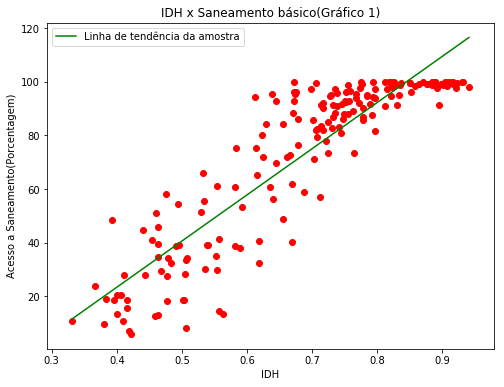

In [31]:
#df_IDH_San_Urb.plot.scatter(x="2011_IDH", y = "2011_San", color = 'red');
#plt.xlabel('Porcentual da população com acesso a Saneamento básico')
#plt.ylabel('IDH')
#plt.title('Grafico de dispersão IDH x Saneamento')
#plt.grid(True)
#plt.show()

reta(df_IDH_San_Urb["2011_IDH"],df_IDH_San_Urb['2011_San'], "IDH x Saneamento básico(Gráfico 1)", "IDH","Acesso a Saneamento(Porcentagem)","red","green")

In [32]:
#df_IDH_San_Urb.plot.scatter(x="2011_IDH", y = '2011_Urb', color = 'orange');
#plt.xlabel('IDH')
#plt.ylabel('Urbanização(%)')
#plt.title('Grafico de dispersão Urbanização x IDH')
#plt.grid(True)
#plt.show()

reta(df_IDH_San_Urb["2011_IDH"],df_IDH_San_Urb['2011_Urb'], "IDH x Urbanização(Gráfico 2)", "IDH","Urbanização(Porcentagem)","orange","blue")

Ajuste linear entre X3 e X4:
Coeficiente linear: -15.152477454831647
Coeficiente angular: 103.09096608261953


Ajuste linear entre X3 e X4:
Coeficiente linear: 21.75753774757053
Coeficiente angular: 0.4646625221232951


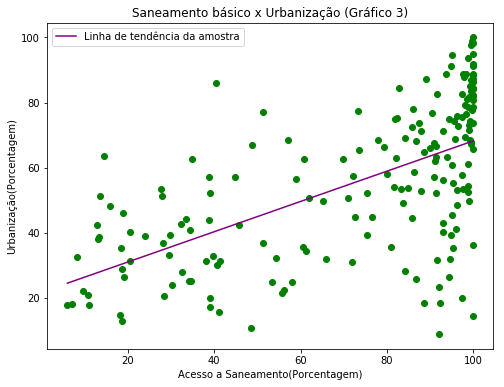

In [33]:
#df_IDH_San_Urb.plot.scatter(x="2011_San", y = '2011_Urb', color = 'green');
#plt.xlabel('Porcentual da população com acesso a Saneamento básico')
#plt.ylabel('Urbanização(%)')
#plt.title('Grafico de dispersão Urbanização x Saneamento')
#plt.grid(True)
#plt.show()
reta(df_IDH_San_Urb["2011_San"],df_IDH_San_Urb['2011_Urb'], "Saneamento básico x Urbanização (Gráfico 3)", "Acesso a Saneamento(Porcentagem)","Urbanização(Porcentagem)","Green","Purple")

C:\Users\55419\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


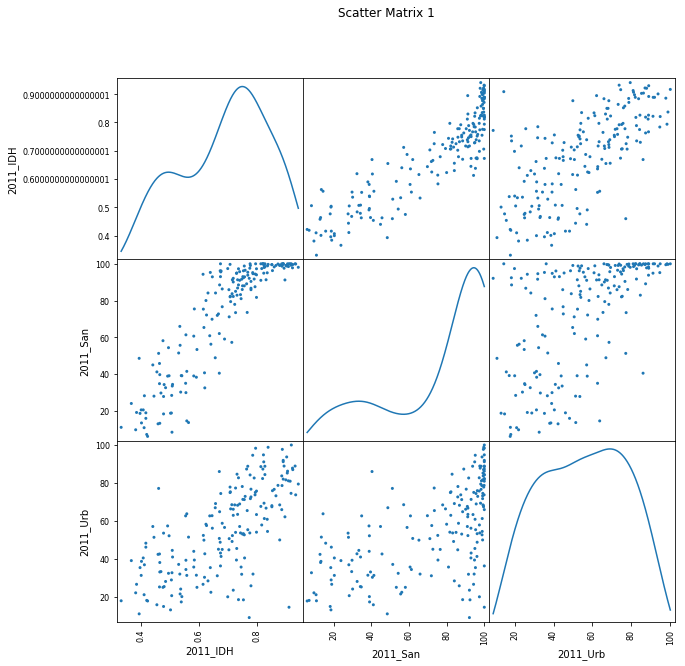

In [36]:
pd.scatter_matrix(df_IDH_San_Urb, figsize = (10,10), alpha = 1, diagonal = "density");
plt.suptitle("Scatter Matrix 1")
plt.show()

In [17]:
df_IDH_San_Urb.corr()

2011_IDH  2011_San  2011_Urb
2011_IDH  1.000000  0.896673  0.690894
2011_San  0.896673  1.000000  0.598025
2011_Urb  0.690894  0.598025  1.000000

<h2> ANÁLISES E CONCLUSÃO</h2>

Para conseguir análisar a relação entre as variavéis foi selecionado um ano especifico para realizar a comparação. Então uniu-se em apenas um dataframe as informações das três varivéis. Com esse dataframe foi possivel plotar graficos "scatter plot" e obter suas retas de tendencia, assim como obter o coeficiente de correlação de cada uma delas dois a dois. Também foi plotado uma "Scatter Matrix" para que seja possível ter a visão como cada variavél se relaciona com todas as demais.
A função discribe da biblioteca pandas foi utilizada para se ter uma visão da distribuição de valores de cada variavél no ano escolhido. Desse modo foram obtidos a mediana dos valores, assim como os valores que representam 25% e 75%, os valores máximo e mínimo, entre outros.

Percebe-se com uma análise superficial de cada variável individualmente que a quantidade de países que tem uma porcentagem alta da população com acesso a saneamento básico é grande, tendo uma mediana de 86,6% e um histograma assimétrico a esquerda, o histograma dos percentuais de urbanização é bastante simétrico, apresentando grande consentração de valores no centro do histograma e baixa nas extremidades e uma média bem proxima do valor da mediana (55.989381 e 56.30).

Foi possível observar no gráfico IDH por Acesso a saneamento básico uma fortíssima correlação entre os indices que é comprovada pelo coefiente de correlação bastante próximo de um: 0.896673. Esse valor, juntamente com a observação do gráfico 1, pode levar a uma resposta positiva ao questionamento inicial, assim como está de acordo com a hipotese inicial. Também foi observado uma correlação forte entre a urbanização e o IDH, tanto através da interpretação do gráfico 2 plotado entre as variavéis quanto pelo coefiente de correlação de 0.690894. Esse indice de correlação menor que o anterior mas ainda assim de grande expressividade também nos leva a uma resposta afirmativa ao questionamento. Essa análise do relação do IDH e a Urbanização vai de encontro com a hipótese inicial. Já a relação entre Saneamento e Urbanização já é menos clara, tendo um gráfico (3) mais disperso e um coefiente de 0.598025, demonstranto que as variaveis tem certa correlação mas indicando também que deve haver outras variavéis externas mais bem relacionadas com as estudadas.